<a href="https://colab.research.google.com/github/gkadusumilli/Machinelearning/blob/master/Image_Recognition_using_Xception_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Image Recognition using Xception Model 

## Load Pre-Trained CNN Model

let us load one of the most complex pre-trained CNN models out there, the **xception model** which is better than Inception V3 model architecture.

priliminary wewill  import required libraries and pre trained **xception** model

In [0]:
!pip install tf-explain


#import libraries

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions
%matplotlib inline




     |████████████████████████████████| 26.6MB 1.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 3.4.5.20
    Uninstalling opencv-python-3.4.5.20:
      Successfully uninstalled opencv-python-3.4.5.20


In [0]:
#load pre trained Xception model

model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=True)
print(model.summary)

W0823 10:49:40.524723 140558258386816 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


91889664/91884032 [==============================] - 1s 0us/step
<bound method Network.summary of <tensorflow.python.keras.engine.training.Model object at 0x7fd6000a9240>>


In [0]:
from google.colab import files
uploaded=files.upload()

Saving liono.jpg to liono.jpg


##Model Predictions on sample Image

we will use a sample image of lion and try to make the top-5 predictions using pre-trained model Xception model
let us load sample image

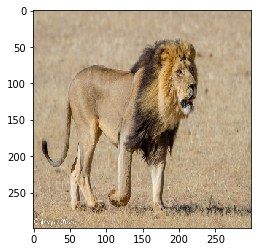

In [0]:
#loading and preprocessing cat image

IMAGE_PATH='liono.jpg'
img=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(299,299))
img=tf.keras.preprocessing.image.img_to_array(img)


#view the image
plt.imshow(img/255.)

In [0]:
import requests

response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
imgnet_map=response.json()

imgnet_map={v[1]:k for k, v in imgnet_map.items()}

#make model predictions

img=tf.keras.applications.xception.preprocess_input(img)
predictions=model.predict(np.array([img]))
decode_predictions(predictions,top=5)

[[('n02129165', 'lion', 0.97826433),
  ('n02106030', 'collie', 0.0011906815),
  ('n02105855', 'Shetland_sheepdog', 0.00032373998),
  ('n02422106', 'hartebeest', 0.0003106558),
  ('n02412080', 'ram', 0.00029521278)]]